<a href="https://colab.research.google.com/github/cam2149/IntroRecSysDesign/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SISTEMA CLASIFICADOR FUZZY PARA V/A EN MÚSICA**

**Derechos de autor:**

Y. Ospitia-Medina, S. Baldassarri, C. Sanz, J. R. Beltrán and J. A. Olivas, "Fuzzy Approach for Emotion Recognition in Music," 2020 IEEE Congreso Bienal de Argentina (ARGENCON), Resistencia, Argentina, 2020, pp. 1-7, doi: 10.1109/ARGENCON49523.2020.9505382.

### **Paso 1:** Instalación de librería SKfuzzy

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


### **Paso 2:** Creación de las funciones de membresía

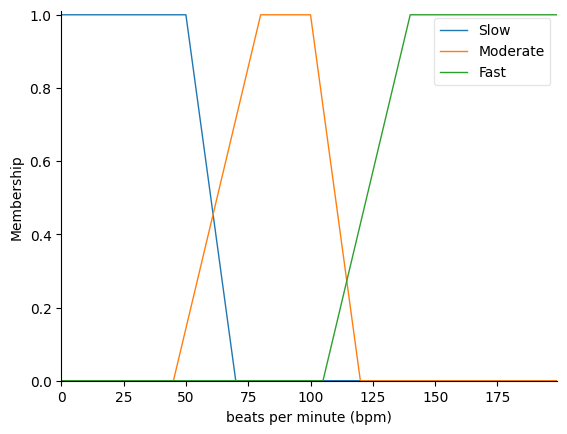

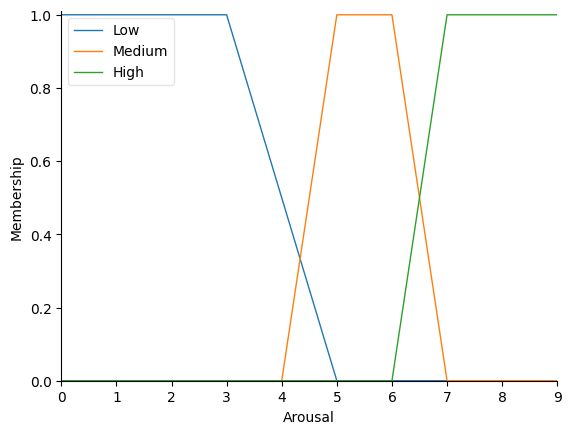

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Funciones
bpm = ctrl.Antecedent(np.arange(0, 200, 1), 'beats per minute (bpm)')
arousal = ctrl.Consequent(np.arange(0, 10, 1), 'Arousal')

# Funciones de membresia para el antencedente
bpm['Slow']= fuzz.trapmf(bpm.universe, [0, 0, 50,70])
bpm['Moderate'] = fuzz.trapmf(bpm.universe, [45, 80, 100, 120])
bpm['Fast'] = fuzz.trapmf(bpm.universe, [105, 140, 200, 200])

# Funciones de membresia para el consecuente
arousal['Low'] = fuzz.trapmf(arousal.universe, [0, 0, 3, 5])
arousal['Medium'] = fuzz.trapmf(arousal.universe, [4, 5, 6, 7])
arousal['High'] = fuzz.trapmf(arousal.universe, [7, 7, 10, 10])

bpm.view()
arousal.view()

### **Paso 3:** evaluación de grados de pertenencia para un valor crisp.

In [3]:
## Valor crips de entrada
entrada=57
## Revisión de grados de pertenencia.
print("Grados de pertenencia en la entrada:")
print("Pertenencia a Slow:")
print(fuzz.interp_membership(np.arange(0, 200, 1),fuzz.trapmf(bpm.universe, [0, 0, 50,70]), entrada))
print("Pertenencia a Moderate:")
print(fuzz.interp_membership(np.arange(0, 200, 1),fuzz.trapmf(bpm.universe, [45, 80, 100, 120]), entrada))
print("Pertenencia a Fast:")
print(fuzz.interp_membership(np.arange(0, 200, 1),fuzz.trapmf(bpm.universe, [105, 140, 200, 200]), entrada))

Grados de pertenencia en la entrada:
Pertenencia a Slow:
0.65
Pertenencia a Moderate:
0.34285714285714286
Pertenencia a Fast:
0.0


### **Paso 4:** definición de reglas.

In [4]:
rule1 = ctrl.Rule(bpm['Slow'], arousal['Low'])
rule2 = ctrl.Rule(bpm['Moderate'], arousal['Medium'])
rule3 = ctrl.Rule(bpm['Fast'], arousal['High'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

### **Paso 5:** utilización del modelo para inferencias fuzzy

Valor crisp de salida:
2.9308414816929553
Método de desfuzificación centroid


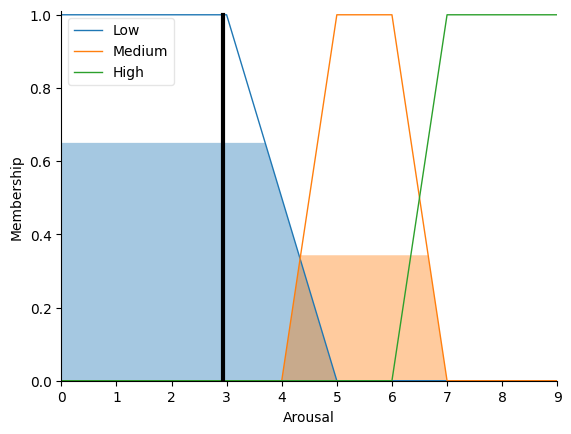

In [5]:
tipping.input['beats per minute (bpm)'] = entrada

# Crunch the numbers
tipping.compute()

print("Valor crisp de salida:")
print (tipping.output['Arousal'])
arousal.view(sim=tipping)

print("Método de desfuzificación", arousal.defuzzify_method)